# OSP portfolio optimization problem

9 June 2020

We present here the numerical solution for the portfolio optimization problem on social platforms of small number of nodes, for which the matrix-inversion and the vector-matrix multiplication do not pose calculation difficulties, so we use a direct approach to program the solution.

$\textbf{Model}$: We analyze the budget allocation problem where a user has a budget and decides to assign it to some users in order to maximize his/her influence on a online network platform through the participation of the selected users.

In such a platform, there are $N > 2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M > 0$ and the Wall of size $K >0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

$\textbf{Assumptions}$: The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users.

We define the influence of user $i$ on user $n$, $q^{(n)}_i$, as the steady-state probability that a post found on the Wall of user $n$ is of label $i$, i.e., has been originally created by user $i$. Note that these probabilities are performance parameters that will be the output of the developed models. We propose the following metric of influence, $\Psi_i =\frac{1}{N-1} \sum_{n \not=i} q^{(n)}_i$.

### Linear System solution (Theorem 2 from paper)

Linear System solution (Theorem 2 from paper)
To find the values of the steady-state vectors $P_{vec}(i)$ and $Q_{vec}(i)$, one needs to solve the following linear system (formulas $(12)-(13)$):

$(12) \space P_{vec}(i) = AP_{vec}(i) + b(i)$

$(13) \space Q_{vec}(i) = C_{vec}(i) + d(i).$

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

### Portfolio Optimization Problem based on influence
Let's select one element in the user set $ i\in \mathcal{N}=\{ 1,...,N \}$, and let it be the set $ S = \{i \}$ ($S$ represents the set where we want to analyze how a joint advertising campaign of the other users is directed to the user i). In turn, suppose that for each post rate of user $n$ different from user $i$, we have $\lambda^{(n)}=a_n \lambda^{(n)}+(1-a_n) \lambda^{(n)}, a_n \in [0,r_n]$, where $a_n$ represents the post rate of user $n$ directed to user $ i $ (that is, directed to advertising), $1-a_n$ represents the post rate of user $n$ directed to personal use of user $n$ and $r_n$ is the maximun participation rate that the user $n$ can dispose in the advertising campaign and $r_i$ a constant.

In our problem framework we have a budget that must not be exceeded $B$, this budget represents the budget limit that the advertising campaign directed to the user $ i $ can cost but don't exceed. Also for each user $ n $, there is a $ c_n $ that represents the cost (in the same scale of $B$) of post over time unit of the user $n$ directed to the advertising campaign. Then the user's individualized budget $ n $ is given by $ B_n = c_n a_n \lambda ^ {(n)}.$

On the other hand, note that if we define the influence of the user $ n \not = i $ directed at advertising towards the set $S $ (denoted by $\Psi_{n,S} (a_n)$), then the only difference between $\Psi_{n, S} (a_n) $ and $ \Psi_n $ is to consider the system as:

$$(\lambda^{(1)},\mu^{(1)}),...,(a_n \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}),$$ Instead of: $$(\lambda^{(1)},\mu^{(1)}),...,( \lambda^{(n)},\mu^{(n)}) ,...,(\lambda^{(N)},\mu^{(N)}).$$

In this way, sequentially we can add all the users differents from the user $i$ and so we are interested in maximizing over the set $\{a_n \}_{n \not=i}$ the sum of each influence through the user $ n \not = i $ directed to advertising towards the user $ i $ and the direct influence of the user $ i $, subject to the budget constraint $ B $ not being exceeded by the sum of the individual budgeting of each user $ n \not = i $. 

Namely, the OSP portfolio optimization problem is to find the vector $\{a_n \}_{n \not=i}$ such that: 

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } \Psi_{n,S} (a_n) +r_i \Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

The $\{a_n \}_{n \not=i}$ vector corresponds to the vector of participations of the users which act cooperatively with the user $i$ and that provide the maximum influence on a social network platform under cost restrictions with a budget $B$ of user $i$.

Through our results we saw that $ \Psi_{n,S} (a_n)=a_n \Psi_{n}, \forall n \in \mathcal{N}\setminus \{i \}$, in this way, our problem turns out to be the following optimization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  + r_i \Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \  0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

which can be solved by our greedy algorithm. 


Let's note that the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B$ can be considered as $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)}=B$ in the non-trivial case ($\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n r_n \lambda ^ {(n)}\geq B$) cause if we have the strict inequality, we can always increase an $a_l$ such the influence is strictly increased and we continue to maintain the inequality as the restriction.

### Portfolio Optimization Problem based on advertising potential

Let's note that our previous maximization metric was to maximize the joint influence of a user $i$ who orchestrates an advertising campaign on a Online Social Platform, thus obtaining a portfolio optimization problem to be solved. Now we will do the same problem but our maximization metric will be the received influence (defined below) or an advertising potential.

% Let's set a policy in an advertising campaign that the user $i$ orchestrates and with a vector of participation rates  $\{a_n \}_{n \not=i}$ of the users in the advertising campaign. The received influence by a user $ j \not = i $ in such policy is $\Omega^{(j)}=\sum_{n \not = i} a_n q^{(j)}_n$ and the average influence received by a user $j$ is $\frac{\sum_{n \not = i} a_n q^{(j)}_n}{\sum_{n \not = i} a_n } $. To this last definition, we can add categorical restrictions $\varsigma_n \subset \{ 1,...,\text{Number of categories} \}, \forall n \in \mathcal{N}$ and minimal influence restrictions $q^{(j)}_n> \epsilon$. That is, $\Omega^{(j)}=\sum_{n \not = i} a_n q^{(j)}_n I_{q^{(j)}_n> \epsilon} I_{\varsigma_n \cap \varsigma_j \not = \varnothing }$. 

These last two possible restrictions are due to the fact that in reality it is common to see that a user $n$ influences user $j$ for advertising purposes if both users have an "affinity", that is, if user $j$ and user $n$ have common interests ($\varsigma_n \cap \varsigma_j \not = \varnothing$) and the restriction of minimal influence is due to the fact that if user $n$ does not have a sufficient degree of influence over user $j$, then user $n$ has no chance of consolidating a sale or any other advertising purpose over user $j$. 

Let's assume the purchase potential or advertising potential is a linear function with respect to influence received by user $j$, then our portfolio optimization problem based on advertising potential is to find the police $\{a_n \}_{n \not=i}$ of our advertising campaign that maximizes advertising potential subject to the budgetary restrictions already mentioned, that is:

$$\max_{ \{a_n \}_{n \not=i} } \sum_{j \in \mathcal{N}\setminus \{i \} } \Omega^{(j)}, \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

Our maximization problem can also be written as:

$$\max_{ \{a_n \}_{n \not=i} } \sum_{j \in \mathcal{N}\setminus \{i \} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n q^{(j)}_n I_{q^{(j)}_n> \epsilon} I_{\varsigma_n \cap \varsigma_j \not = \varnothing}), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

Observe that our portfolio optimization problem based on influence is certainly similar to the optimization problem based on advertising potential (if it's linear), but different because we change $\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n} \propto \sum_{n \in \mathcal{N}\setminus \{i \} } a_n (\sum_{j \in \mathcal{N}\setminus \{n \} } q^{(j)}_n) = \sum_{n \in \mathcal{N}\setminus \{i \} } (\sum_{j \in \mathcal{N}\setminus \{n \} } a_n q^{(j)}_n)$ for $\sum_{j \in \mathcal{N}\setminus \{i \} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n q^{(j)}_n)$. That is, one problem finds the policy that maximizes joint influence in one advertising campaign and the other maximizes the advertising potential on a online social platform subject to an advertising campaign.

Note that the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B$ can be considered as $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)}=B$ in the non-trivial case ($\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n r_n \lambda ^ {(n)}\geq B$) cause if we have the strict inequality, we can always increase an $a_l$ such the influence is strictly increased and we continue to maintain the inequality as the restriction.

In general, suppose we have a function $f$ that maps an influence received by user $j$ by a purchase potential or advertising potential, then our problem of maximizing advertising potential subject to budgetary restrictions becomes:

$$\max_{ \{a_n \}_{n \not=i} } \sum_{j \in \mathcal{N}\setminus \{i \} } f(\Omega^{(j)}), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

Or more in general: 

$$\max_{ \{a_n \}_{n \not=i} ; \epsilon} \sum_{j \in \mathcal{N}\setminus \{i \} } f(\Omega^{(j)}), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

If $f$ is linear, then the problem can be solved by a greedy algorithm, but in general we need to appeal to iterative processes to approximate the desired advertising policy.

### Implementation
$\textbf{Notes}$: For the implementation, we first generate an input from graphs of specific form. We choose here to generate a Erdos-Renyi graph, Albert-Barabasi granp, Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The implementation is divided into two parts:

* Portfolio Optimization Problem based on influence: We will first find the influences of the users explicitly with the method desired by the user, Closed-form algorithm or Fixed-point algorithm. Consequently, we obtain the cost of each user (defined after) and with it, we will compute the numerical solutions of the OSP portfolio optimization problem through the well-known simplex algorithm or our greedy algorithm. Finally, we will give relevant information for the investor point of view and observations. As we will see later, the OSP portfolio optimization problem always has a basic feasible solution and the python implementation of simplex algorithm gives it to us. The computational complexity for the OSP portfolio optimization problem is polynomial-time in the number of users with degree at least 3 with the method based on matrix inversion and $N \log N$ with our greedy algorithm. 


* Portfolio Optimization Problem based on advertising potential: The process to find the solutions is done similarly to the previous one, finding the influences of the users, getting the cost of each user and then we find the solutions of the portfolio optimization problem based on advertising potential fixing $\epsilon$ and later we solve our problem considering $\epsilon$ as one more variable in our model. So we proceed to make relevant plots of each method and finally, we will do an analysis of the different approaches studied and pointing out some relevant observations.

Note that the implementation is not sparse and in non-symmetric graphs the (M1) outperforms (M2). Also, in the case of the portfolio optimization problem based on advertising potential we do not guaranteed the uniqueness nor the feasibility nor existence of solutions for all the functions $f$ and that our algorithm in this method finds local solutions, but not global ones.

However, in the case that $f$ is a smooth concave function, we have the uniqueness, feasibility and existence of solutions and therefore the algorithm will find such solution as well as in the case of the indicator function because the set of points of non-smoothness of this function has zero measure.

In [1]:
%pylab inline
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.optimize as opt
import networkx as nx
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


We load the functions that we define in the OSP model

In [2]:
%run OSP_Model.ipynb

Populating the interactive namespace from numpy and matplotlib


## 1. Input Graphs
We first would like to generate the input graphs for our Social platform.

We propose four graph categories: (I) Erdos-Renyi Graph, (II) Albert-Barabasi Graph, (III) Ring Graph, (IV) Grid Graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $L_{vec}$ and $M_{vec}$ (3) Leader graph (either NxN or list), (4) the cost per post for each user and (5) the user $i$ who orchestrates the advertising campaign.

For the special cases Erdos-Renyi, Albert-Barabasi and Ring Graph, a probability $pr$ in Erdos-Renyi graph $G(N,p)$, the number of edges $m$ to attach from a new node to existing nodes in the Barabasi-Albert model and a radius $R$ should also be defined, which determines the number of leaders per user.

In [3]:
# Number of users in Social graph, pr probability in Erdos-Renyi graph G(N,pr) and m is the number of edges to attach from a new node to existing nodes in the Barabasi-Albert model
N=25
m=3
pr=.2

### I. Erdos-Renyi Graph

We fix the probability $pr$ and a Erdos-Renyi graph $G(N,pr)$ is constructed. Namely by connecting nodes randomly with directed edges where each edge is included in the graph with probability $pr$ independent from every other directed edge. 

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. $R_{vec}[0]$ refers to the number of leaders for user "0", and similarly $R_{vec}[n]$ for user "n".

In [4]:
Lead=erdos_graph(N,pr) #We select graph structure

We will now draw the produced directed Leader Graph.

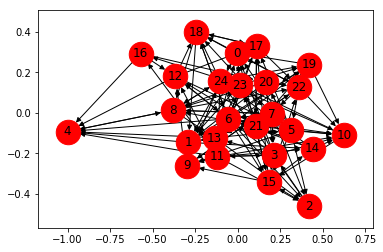

In [5]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### II. Albert-Barabasi Graph

In the Albert-Barabasi graph, we begin with an initial complete network of $m$ nodes and $N-m$ new nodes are added to the network one at a time. Each new node is connected to $m$ existing nodes with a bi-directed edge and a probability that is proportional to the number of links that the existing nodes already have, namely $\frac{\text{degree}_i}{\sum_{j \not=i} \text{degree}_j}$ with $\text{degree}_i$ the degree of user $i$. Then, heavily linked nodes tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. 

In [6]:
Lead=barabasi_albert(N, m) #We select graph structure

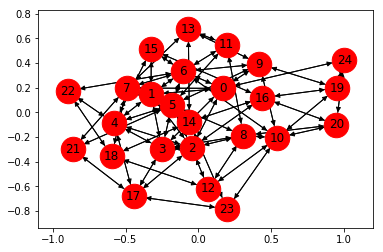

In [7]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### III. Ring Graph
we set the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

In [8]:
#Ring graph-------------------------------------------------------------------------------------------------------------------
# Inout Radius
# Defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)

In [9]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)

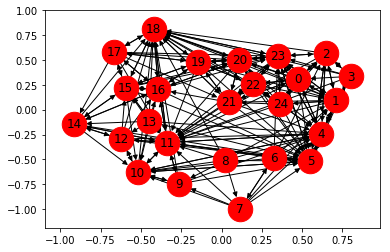

In [10]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadRing[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### IV. Grid graph
In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [11]:
Lead=grid_graph(N) #We select graph structure

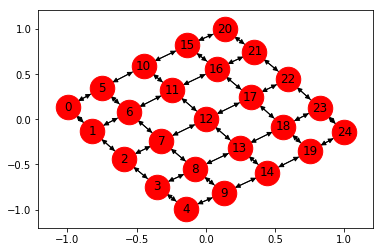

In [12]:
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = Lead[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
pos=nx.spring_layout(Gring,iterations=100)
nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## 2. General Input

We first define the general input (1),(2) and (3) related to size and activity. So, we could calculate using (M1) or (M2) the influence metric for each user and then we could get the cost per post (4) for each user and get our basic feasible solution 
through the simplex method or by our greedy algorithm.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [13]:
#General Input (N, Lvec, Mvec)--------------------------------------------------------------------------------------------------
N=50
print("N=",N,'\n') # network size
# Activity
# Activity Scenario case 1: random activity
Amax = 100 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

N= 50 

Lvec1= [43.31348 57.54842 89.39066 72.79218 31.04808 97.9784  75.04111 69.02195
 13.39046 38.01432 76.73699 30.31676 27.75491 33.44967 97.8675  66.24407
 83.29953  2.5774  32.89778 59.54702 71.1564  33.42111 49.18147 55.37755
 28.85875 34.43184  6.61124 33.40467 19.30495 59.35408 74.93912 44.62603
  5.96877 41.29015 24.57078 14.76638 89.92817 17.80434 86.7266  99.72439
 26.9402  40.23735 44.30316 56.78056 36.31528 57.60315 47.63361  2.84116
 52.84987 64.55056] 
 Mvec1= [10.08942  9.87324 27.81081 80.75079 82.74194 66.93032 83.57041 28.39073
 31.70665 29.36391 57.23789 88.78414 82.72428 10.61236 66.00199 89.36273
 28.49811 76.84143 83.39263 20.62154 66.60911 17.19365 62.37166 80.34612
 11.68093 34.88099 72.21294 78.9525  38.01883 83.64977 37.37696 49.54713
 84.97822 39.92792 25.82238 68.65464 31.80854  4.20752 71.25935 81.40037
 15.02425 83.1036  93.68915 46.76314 89.86596 59.49968 98.3585  48.25207
 22.70103 66.9188 ] 

Lvec2= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

#### Input parameter

The input chosen:

In [14]:
print("N=",N,'\n')
Lvec = Lvec1
print("Lvec=",Lvec,'\n')
Mvec = Mvec1
print("Mvec=",Mvec,'\n')

N= 50 

Lvec= [43.31348 57.54842 89.39066 72.79218 31.04808 97.9784  75.04111 69.02195
 13.39046 38.01432 76.73699 30.31676 27.75491 33.44967 97.8675  66.24407
 83.29953  2.5774  32.89778 59.54702 71.1564  33.42111 49.18147 55.37755
 28.85875 34.43184  6.61124 33.40467 19.30495 59.35408 74.93912 44.62603
  5.96877 41.29015 24.57078 14.76638 89.92817 17.80434 86.7266  99.72439
 26.9402  40.23735 44.30316 56.78056 36.31528 57.60315 47.63361  2.84116
 52.84987 64.55056] 

Mvec= [10.08942  9.87324 27.81081 80.75079 82.74194 66.93032 83.57041 28.39073
 31.70665 29.36391 57.23789 88.78414 82.72428 10.61236 66.00199 89.36273
 28.49811 76.84143 83.39263 20.62154 66.60911 17.19365 62.37166 80.34612
 11.68093 34.88099 72.21294 78.9525  38.01883 83.64977 37.37696 49.54713
 84.97822 39.92792 25.82238 68.65464 31.80854  4.20752 71.25935 81.40037
 15.02425 83.1036  93.68915 46.76314 89.86596 59.49968 98.3585  48.25207
 22.70103 66.9188 ] 



Choose between our graphs:

In [15]:
# In case we choose Albert-Barabasi:
#Lead = barabasi_albert(N, m)
# In case we choose Ring:
#Lead = ring_graph(N,Rvec,lead=1,sym=1)
# In case we choose Grid:
#Lead = grid_graph(N)
#
# In case we choose Erdos-Renyi:
Lead = erdos_graph(N,pr)
print("Lead=",Lead)

Lead= [[8, 9, 10, 16, 20, 30, 34, 39, 40, 44, 46], [4, 6, 20, 27, 29, 34, 35, 39, 40, 42, 43, 44, 46], [4, 12, 13, 23, 24, 26, 28, 48], [7, 15, 17, 20, 30, 31, 32, 35, 36, 47], [0, 6, 7, 14, 16, 30, 33, 37, 38, 39, 41, 45, 46, 49], [6, 13, 18, 20, 25, 36, 38, 49], [11, 22, 25, 32, 35, 41], [9, 16, 20, 26, 28, 30, 33, 49], [1, 6, 7, 11, 18, 21, 22, 31, 37, 40, 42, 45, 46, 48], [13, 21, 25, 28, 34, 47], [3, 4, 6, 9, 15, 25, 29, 48, 49], [1, 7, 13, 16, 24, 26, 31, 37, 45], [0, 14, 16, 18, 25, 36, 41, 47], [19, 22, 25, 29, 31, 33, 34, 45, 48], [8, 10, 13, 15, 17, 23, 25, 26, 31, 32, 34, 40, 44, 46], [1, 6, 13, 34, 38, 47], [4, 6, 15, 17, 30, 37, 40, 41], [4, 18, 20, 25, 26, 29, 33, 35, 37], [4, 17, 19, 24, 32, 35, 36, 43, 44, 48, 49], [2, 9, 27, 34, 39, 40, 45], [0, 3, 8, 14, 16, 22, 28, 39, 40], [11, 27, 48], [1, 4, 6, 11, 13, 24, 27, 32, 33, 35, 37, 40, 41, 42, 46, 49], [2, 12, 14, 16, 19, 22, 26, 27, 28, 38, 42, 44], [1, 2, 3, 10, 15, 27, 33, 34, 41, 42, 43], [0, 4, 5, 12, 15, 20, 39, 4

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can get the matrices composed of the steady-state probabilities $P_{vec}$, $Q_{vec}$ and the influence vector through the method chosen by the user and subsequently we will calculate the cost function defined below.

### Cost Function

We define a cost function in our context of social media platform as a family of non-negative functions $\{ C_n \}_{n \in \mathcal{N}}$ of the form:

$$C_n:\mathcal{G} \times [\lambda_1 \times ... \times \lambda_N] \times [\mu_1 \times ... \times \mu_N] \rightarrow R^{+}\cup \{ 0\}.$$

The function $C_n$ will represent the cost per post agreed by user $i$ and user $n$ of a monetary unit.

Let's consider two of the most relevant parameters when we consider a cost function of a user $n \in \mathcal{N}$  in an online social platform: the number of followers and the average engagments of user $n$. 

Observe that, once fixed $\mathcal{G}, [\lambda_1 \times ... \times \lambda_N], [\mu_1 \times ... \times \mu_N]$, the average engagments is equivalent in our model to the average number of sharings of label of the user $n$ in our social platform, which is the average of the set composed by the steady-state probabilities that a post found on the Wall of a user $l \not=n$ is of label $n$ times the number of followers of user $n$. So, we have that $\text{Average Engagments}_n=\Psi_n \ \text{Number of followers}_n$ and a cost function is a function of the form $c:\mathbb{Z}^{+}_{0} \times [0,1] \rightarrow R^{+}\cup \{ 0\}.$ where the first variable corresponds to the number of followers and the second to the influence from a specific user $n$ on a network and also this cost function should be invariant between users fixed the two parameters (so we consider one function for all the users).

Certain natural properties we ask of a cost function are $c (k,\psi)=0 \iff k=\psi=0, c (0,\psi)=0, \forall \psi \in [0,1]$, $c (k,0)>0, \forall k \in \mathbb{Z}^{+}$, increasing monotony in the number of followers $k$ and the average engagments $\psi*k$ and we also ask that a cost function has concavity and the positively linearly homogeneous property. So, our cost function satisfies $c (k,0)>0, \forall k \in \mathbb{Z}^{+}$ and therefore this can be expressed in the form:

$$c(k,\psi)=f(k)+g(k,\psi),$$

Where $f(k)>0, \forall k \in \mathbb{Z}^{+}$, $g(z,\psi) \geq 0,\forall k \in \mathbb{Z}^{+}_0, \psi \in [0,1]$ (taking for example $g=c-f$) and $f(k)=0 \iff k=0$,$ g(k,\psi)=0 \iff k=\psi=0$, increasing monotony in $k$ and $\psi*k$ of $f+g$ and where concavity and positively linearly homogeneous property remains in $f+g$. Therefore for simplicity we will consider a linear combination of the functions $f$ and $g$, namely: 

$$f(k)=K_1 \text{Number of followers}=K_1 k, g=K_2 \text{Average Engagments}=K_2 \Psi_n \ \text{Number of followers}=K_2 \psi \ k.$$

On the other hand, following the recommendations of the web pages https://buffer.com/resources/influencer-marketing-cost, https://buffer.com/library/influencer-marketing-guide and the Instagram money calculator on the web-page https://influencermarketinghub.com/instagram-money-calculator/ allow us to assign a cost estimate of the form $k_1\frac{\text{Number of followers}_n}{1000}$ or $k_2\frac{\text{Average Engagments_n}}{1000}$ with $k_1,k_2$ constants depending on the online social platform and the monetary unit will be dollars or euros. So, we have that the cost per post is of the form $k_1\frac{\text{Number of followers}_n}{1000}$ or $k_2\Psi_n \frac{\text{Number of followers}_n}{1000}$, in this way we can define our estimate of the cost function as a convex combination of $k_1\frac{\text{Number of followers}_n}{1000}$ and $k_2\frac{\text{Average Engagments_n}}{1000}$, namely in our case: 

$$\gamma k_1\frac{\text{Number of followers}_n}{1000}+(1-\gamma) k_2\Psi_n \frac{\text{Number of followers}_n}{1000}, \gamma \in [0,1].$$

Remember that a desirable property in a cost function is concavity which it is in our case as well as the positively linearly homogeneous property (which remains in the number of followers) and for this reason we consider in particular this kind of linear combination $K_1=\gamma \frac{k_1}{1000}, K_2=(1-\gamma) \frac{k_2}{1000}$ and note that the number $1000$ is associated with the public that is potentially influenced by the post from user $n$ and the latter should therefore be invariant through the online network platform regardless of the size of the network. 

Let's observe that the cost function of one user $n$ is by definition independent of the post rate $a_n$ of user $n$ directed to user $i$. However it may be dependent to the the maximun participation rate that the user $n$ can dispose in the advertising campaign.

For the rest of the work we will consider being under a social network platform with structure and income potential like Instagram, namely $(k_1,k_2)=(5,250)$ and for simplicity we will consider $\gamma=\frac{1}{2}$. Therefore our cost function to consider is $\frac{5}{2}\frac{\text{Number of followers}_n}{1000}+\frac{250}{2}\Psi_n \frac{\text{Number of followers}_n}{1000}$. In general we can define a cost function in severals ways like we have already said, however we prefer to utilize this function of cost because the estimated price per post is more realistic and with the minimal hypotheses required to make it a cost function.

In [16]:
#Cost function definition-------------------------------------------------------------------------------------------------------
def Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=.5,k1=5,k2=250): #Psi and the Followers is not necessary pass them to the cost function (because it can calculate in). However, we grant it as a parameter for simplicity.
    Cs=np.zeros(N)
    Cs=[gamma*k1*len(Follow[x])/1000+(1-gamma)*k2*Psi[x]*len(Follow[x])/1000 for x in range(N)] #Here we defined the cost of one user like the slide-show (a deterministic quantity): How Much Does Social Media Influencer Marketing Cost?. Namely taking in count that one follower is equal to 1000 followers, we calculated the cost like the sum of $5 times the numbers of followers and $250 times the engagment rate (equivalent to our influence of the user) times the number of followers
    return Cs

And we get the cost per post for each user

In [17]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
gamma_aux=.5
k1_aux=5
k2_aux=250
Followers=[list() for j in range(N)] #Follower list
for l in range(N):
    for m in Lead[l]:
        Followers[m].append(l)
restric=[1 for x in range(N)]
#restric=[1/2*(x % 2) for x in range(N)]
#restric=np.random.uniform(0,1, N)
#restric=np.random.beta(2,10,size=N)
Cs=Ct(N,Lead,Lvec,Mvec,P2,Q2,Psi2,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
print("The cost per post of user are respectively",Cs)

The cost per post of user are respectively [0.01948748026268257, 0.0469961513311406, 0.01799574043731448, 0.035557558118862166, 0.048036961249488606, 0.04403150928985311, 0.06513162108966776, 0.04556624203386893, 0.01617677309284983, 0.02424683434837425, 0.027654823514883208, 0.01805264965985923, 0.02830439122487301, 0.04069122459487841, 0.06236809664374918, 0.05658399814696169, 0.046966644497725224, 0.02062541550657216, 0.03634906493665385, 0.021897916939593247, 0.0480403532804273, 0.015331531643211905, 0.033127019438983496, 0.020337680008211702, 0.04012774458661692, 0.046309149045737796, 0.027147244336756304, 0.04061851240312503, 0.02451749853099806, 0.037118461977079194, 0.04425633781489201, 0.05121067932466467, 0.032437766577574974, 0.04121723071911715, 0.031531350523982114, 0.029800132096524993, 0.06616099706053458, 0.03462714675341773, 0.04401365295379844, 0.05043383132832982, 0.03718092404108398, 0.06576818709007548, 0.05505444994679143, 0.0285484386179381, 0.030133939713937935,

## 3. OSP portfolio optimization numerical solutions

## 3.1. OSP portfolio optimization numerical solutions based on influence

Let's notice that given the elements (1), (2), (3) and (4), then we only have to define the user $i$ who orchestrates the advertising campaign. Once such user $i$ is selected, we can proceed to apply two algorithms.

### Simplex method

We can solve with the simplex method our maximization problem:

$$\max_{ \{a_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +r_i \Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$


And find the vector of advertising rates $\{a_n \}_{n \not=i} $. Note that the problem always has at least one solution for $N>2$ because is upper-bounded due to $a_l \in [0,r_l], \forall l$ and non-empty cause we can consider $a_{j_1}=r_{j_1},...,a_{j_l}=r_{j_l}$ as long as we can add others $r_{j}$´s, $j_1,...,j_l \not= i$ keeping $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_{j_n} r_{j_n} \lambda ^ {(j_n)} \leq B$ and when we stop adding $r_{j}$´s take $a_{j_{l+1}}=\frac{B-\sum_{n \in \mathcal{N}\setminus \{i \} }  c_{j_n} r_{j_n} \lambda ^ {(j_n)}}{ c_{j_{l+1}}\lambda ^ {(j_{l+1})}}$ and the others $a_{j}$´s zero. So it has a supremum and then exists a feasible basic solution and it can be approximated by the simplex method.

Let $\Psi$ the influence vector, $A^{*}=\begin{bmatrix}
c_1\lambda ^ {(1)}&\cdots &c_{i-1}\lambda ^ {(i-1)}& c_{i+1}\lambda ^ {(i+1)}&\cdots &c_N\lambda ^ {(N)} \\
0&\cdots &0& 0&\cdots &0
\end{bmatrix}$, $a^{*}=\begin{bmatrix}
a_1 \\
\vdots\\
a_{i-1}\\
a_{i+1}\\
\vdots\\
a_n
\end{bmatrix}$ and $b^{*}=\begin{bmatrix}
B \\
0
\end{bmatrix}$. Notice that our problem is equivalent to minimize $-\Psi \, a^{*}$ subject to $A^{*}a^{*}=b^{*}$ and $a_l \in [0,r_l]$. Finally, the vector $\{a_n \}_{n \not=i}$ can be found by the simplex method.

Below we program the OSP portfolio optimization numerical solutions considering to the user $i$ as a participant in the advertising campaign at no cost $a_i = r_i$ and then the solution includes user $i$.

In [18]:
#OSP portfolio optimization solutions with simplex method-------------------------------------------------------------------------------------------
def OSPS(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Maux=sum(Cs)-Cs[i]
    csaux=np.delete(Cs,i)
    psiaux=-1.0*(np.delete(Psi,i))
    Laux=np.delete(Lvec,i)
    Aaux=np.array([numpy.multiply(Laux,csaux),[0 for x in range(N-1)]])
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    a_bounds = [[0,restriction[x]] for x in np.delete(range(N),i)]
    StopT = time.time()
    TotalT = StopT-StartT
    return [opt.linprog(psiaux, method='simplex', A_ub=Aaux, b_ub=[Budget,0], A_eq=None, b_eq=None,bounds= a_bounds ),P,Q,Psi,TotalT,df] 

### Greedy algorithm

Let $\{i_{k} \}$ the $k$-th maximal index of the set  $\{\frac{\Psi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$. Observe if we select in a sequential order for $l=1,...,N-1$: $$a_{i_l}=r_{i_l} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} \leq B_{l} }+ \frac{B_{l}}{c_{i_l} \lambda ^ {(i_l)}} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} > B_{l} }$$
With $B_{l}=B-\sum_{k<l} a_{i_k} c_{i_k} \lambda ^ {(i_k)},B_1=B$, then by construction we have that $\sum_{l <N} a_{i_l} c_{i_l} \lambda ^ {(i_l)} \leq B$ and we have our solution vector for the OSP portfolio optimization problem as the following theorem says.


$\mathbf{Theorem.}$ The vector $\{ a_{n} \}_{n \not=i}$ is an solution vector for our OSP portfolio optimization problem and it is the unique solution if $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} } \not= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} },  \forall n_{1} , n_{2} \not= i$.

Let $a^{*}_n=c_n \lambda ^ {(n)} a_n, \forall n \not =i$. Note that it is sufficient to solve the following optimization problem to solve our original optimization problem:

$$\max_{ \{a^{*}_n \}_{n \not=i} } (\sum_{n \in \mathcal{N}\setminus \{i \} } a^{*}_n \frac{\Psi_{n} }{c_n \lambda ^ {(n)}} +r_i \Psi_i ), \textbf{subject to} \sum_{n \in \mathcal{N}\setminus \{i \} }  a^{*}_n \leq B, \ 0 \leq a^{*}_n \leq c_n \lambda ^ {(n)} r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$

Observe that by construction our optimization problem has a solution $\{a_n \}_{n \not=i}$ if and only if the above optimization problem has a solution given by $\{ \frac{a^{*}_n}{c_n \lambda ^ {(n)} } \}_{n \not=i}$. We can also have several solutions a priori, however we have a bijection between the set of solutions of the optimization problems similarly as we just said.


The trivial case $\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n r_n \lambda ^ {(n)} > B$ is clear because we are forced to take as a solution $a_{n}=r_{n}, n \not=i$ to get the maximum joint influence. Therefore we will work with the non-trivial case, that is, as we said above without loss of generality with the restriction $\sum_{n \in \mathcal{N}\setminus \{i \} }  a^{*}_n = B$.


Suppose there is a vector ${ \{b_n \}_{n \not=i} },b_n \in [0,r_n], \forall n \not=i $ with
$$\sum_{n \in \mathcal{N}\setminus \{i \} } b_n \Psi_{n}  +r_i \Psi_i \geq \sum_{n \in \mathcal{N}\setminus \{i \} } a_n \Psi_{n}  +r_i \Psi_i, \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n b_n \lambda ^ {(n)} = B, \  0 \leq b_n \leq r_n,  \forall n \in \mathcal{N}\setminus \{i \}.$$ We will proceed by contradiction to prove that $a_n=b_n, \forall n \not=i$.

Let $r$ be the smallest positive integer such that $a_{i_r} \not =0$, then by construction $a_{i_r}= \frac{B-\sum_{k<r} c_{i_k} r_{i_k} \lambda ^ {(i_k)}}{c_{i_r} \lambda ^ {(i_r)}}$ and $a_{i_l}=r_{i_l}, \forall l<r$.

Let's define as above $b^{*}_n=c_n \lambda ^ {(n)} b_n, \forall n \not =i$. Suppose that exists a integer $l$ such that it is the smallest positive integer such that $b_{i_l}<a_{i_l}$. We are going to proceed by contradiction, we have $b^{*}_{i_l}< a^{*}_{i_l}$ and by hypothesis $$\sum_{k=1,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=1,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff \sum_{k=l,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=l,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}}.$$

Notice that defining $b^{*}_{i_{j}}=a^{*}_{i_{j}}+d_{j}, j=l+1,...,N-1$, then the equality $\sum_{n=l,...,N-1  }  b^{*}_n =B=\sum_{n=l,...,N-1  }  a^{*}_n$ must be satisfied, then $\sum_{s=l+1,...,N-1} d_{s}=a_{i_l}-b_{i_l}$.

Therefore, $$\sum_{k=l,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq \sum_{k=l,...,N-1 } a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff  b^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} b^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  a^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} a^{*}_{i_{k}} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \iff$$

$$\iff b^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}+\sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  a^{*}_{i_{l}} \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}} \iff \sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \geq  (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}.$$

Observe that $\sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{k}}} }{c_{i_{k}} \lambda ^ {({i_{k}})}} \leq \sum_{k=l+1,...,N-1} d_{k} \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} = (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}}$, then $$(a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} \geq (a^{*}_{i_{l}}-b^{*}_{i_{l}}) \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}} \iff \frac{\Psi_{{i_{l+1}}} }{c_{i_{l+1}} \lambda ^ {({i_{l+1}})}} \geq \frac{\Psi_{{i_{l}}} }{c_{i_{l}} \lambda ^ {({i_{k}})}}.$$

However, we have a contradiction because $\{i_{l} \}$ is the $l$-th maximal index of the set  $\{\frac{\Psi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$ and all the elements in this set are differents by hypothesis, then such $l$ does not exist. 

So  $b_{i_l} \geq a_{i_l}, \forall l$. Suppose that exists a integer $l$ such that $b_{i_l}>a_{i_l}$, then we have $$\sum_{n \in \mathcal{N}\setminus \{i \} }  c_n b_n \lambda ^ {(n)} > \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} = B$$ And it is a contradiction. Therefore $b_{i_l}=a_{i_l}, \forall l$. 
 
Note that $\{ a_{n} \}_{n \not=i}$ is a solution because when we exchange all the symbols $\geq$ for $>$, we get contradictions even without the hypothesis $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} } \not= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} },  \forall n_{1} , n_{2} \not= i$.


Finally, $a_{n}, \forall n \not=i$ is an solution vector and it is the unique solution vector for our OSP portfolio optimization problem and we have the desired.

It is important to note that if $ \exists n_{1} , n_{2} \not= i$ with $\frac{\Psi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} }= \frac{\Psi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} }$, then our solution may not be the only solution, but it is unique module 
the permutations where the elements $\frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}}$ are equal.

Notice that our greedy algorithm has a computational complexity of order $\mathcal{O}(N \ log N)$ (using merge sort to order the set $\{ \frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}} \}_{n \not=i}$) and it can be improved to $\mathcal{O}(N)$ in the average case for some distributions of $\frac{\Psi_{n} }{c_{n} \lambda ^ {(n)}}$. So, it is a good algorithm to use in large data sets

We program our greedy algorithm below

In [19]:
#OSP portfolio optimization solutions-------------------------------------------------------------------------------------------
def OSP(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Costs=numpy.multiply(Lvec,Cs)
    actual=[1 for x in range(N)]
    alps=np.zeros(N)
    actual[i]=0
    Baux=Budget
    iList=list(argsort(np.multiply(Psi,np.reciprocal(Costs)),kind="mergesort"))
    iList.remove(i)
    while sum(actual)>0 and Baux>0:
        iaux=iList.pop()
        if Baux>Costs[iaux]*restriction[iaux]:
            actual[iaux]=0
            alps[iaux]=restriction[iaux]
            Baux=Baux-Costs[iaux]*restriction[iaux]
        else:
            alps[iaux]=Baux/Costs[iaux]
            actual[iaux]=0
            Baux=0
    alps[i]=restriction[i]
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    StopT = time.time()
    TotalT = StopT-StartT
    return [alps,P,Q,Psi,TotalT,df]

We fix the budget and the user $i$ who orchestrates the advertising campaign

In [20]:
B=50 #Budget
i=1 #User who orchestrates the advertising campaign
restric[i]=1
print("The maximun participation rates per user in the advertising campaign are:",restric)

The maximun participation rates per user in the advertising campaign are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


We get the solutions with the simplex method and with our algorithm

In [21]:
#Solutions with simplex method
SS=OSPS(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
solutionsS=SS[0]["x"]
O=np.append(np.append(solutionsS[:i], [0]), solutionsS[i:])
Oaux=O
Oaux[i]=restric[i]
SS[5]['Advertising rate of user']=Oaux
NZ=[]#Vector of rates of selected users in the OSP portfolio optimization solutions
U=[]#Vector of users in the advertising campaign in the OSP portfolio optimization solutions
for x in range(N):
    if O[x]!=0:
        U.append(x)
        NZ.append(O[x])
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", U,"\n")
print("Their rates are:",np.round(NZ,10),"\n")
print("The joint influence is:",sum(np.multiply(NZ,SS[3][U])))
print("The budget required is:",sum([Lvec[x]*Cs[x]*O[x] for x in U])-Lvec[i]*Cs[i]*O[i])

The advertising campaign is over the user: 1 

The users between  [0, 49] to include are: [0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49] 

Their rates are: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.96765294 1.
 1.         1.         1.         1.         1.         1.
 1.        ] 

The joint influence is: 0.3200405158309697
The budget required is: 50.00000000000001


In [22]:
S=OSP(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
solutions=S[0]
US=list()
RA=list()
for x in range(N):
    if solutions[x]!=0:
        US.append(x)
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", US,"\n")
print("Their rates are:", solutions[US],"\n")
print("The joint influence is:",sum(np.multiply(S[3][US],solutions[US])))
print("The budget required is:",sum([Lvec[x]*Cs[x]*solutions[x] for x in US])-Lvec[i]*Cs[i]*solutions[i])

The advertising campaign is over the user: 1 

The users between  [0, 49] to include are: [0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49] 

Their rates are: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.96765294 1.
 1.         1.         1.         1.         1.         1.
 1.        ] 

The joint influence is: 0.3200405158309697
The budget required is: 50.00000000000001


They are the same solutions as we proved and we proceed to get the OSP portfolio optimization numerical solutions and more information

In [23]:
OS=OSP(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
X=OS[0]
#OS=OSPS(N,Lead,Lvec,Mvec,B,1,i,Followers,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
#X=OS[0]["x"]
#O=np.append(np.append(X[:i], [0]), X[i:])
#Oaux=O
#Oaux[i]=1
Oaux=X
OS[5]['Advertising rate of user']=X
#OS[5]['Advertising rate of user']=Oaux
NZ=[]#Vector of rates of selected users in the OSP portfolio optimization solutions
IF=[]#Vector of number of followers in the OSP portfolio optimization solutions
U=[]#Vector of users in the advertising campaign in the OSP portfolio optimization solutions
In=[]#Vector of infuences in the OSP portfolio optimization solutionsfor x in range(N):
for x in range(N):
    if O[x]!=0:
        U.append(x)
        IF.append(OS[5]['Number of followers'][x])
        NZ.append(O[x])
        In.append(OS[3][x])
print("The advertising campaign is over the user:", i,"\n")
print("The users between ", [0,N-1], "to include are:", U,"\n")
print("Their rates are:", NZ,"\n")
print("Their influences are:", In,"\n")
print("Their number of followers are:", IF, "\n")
print("Elapsed Time ", OS[4], "\n")
print("Summary table")
print("User",OS[5], "\n")

The advertising campaign is over the user: 1 

The users between  [0, 49] to include are: [0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49] 

Their rates are: [1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9676529397093447, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

Their influences are: [0.005983307016910096, 0.01759692106491248, 0.008793184699703166, 0.009561206922762218, 0.01645299362709514, 0.0015690307904664413, 0.011605512588437948, 0.004070199546478973, 0.0051594588665537875, 0.009593617887184294, 0.0006254155065721583, 0.009079251949323084, 0.00919722258612433, 0.004530450629139045, 0.009446239501318664, 0.007116906677615604, 0.009183814244812306, 0.010872766030491861, 0.001717795469405043, 0.00707900826875002, 0.004517498530998059, 0.012994188424070395, 0.0141404

### Relevant information based on influence

The next information is relevant from the investor's point of view:

In [24]:
#Test the results---------------------------------------------------------------------------------------------------------------
print("The initial influence of user",i, "across the network is",restric[i]*S[3][i]/(sum(OS[3]))*100, "%\n")
 
print("Our Budget is",B, "EURO per time unit", "\n")

print("The influence of that the investor gain across the network is",sum(numpy.multiply(Oaux,OS[3]))/(sum(OS[3]))*100,"%", "\n" )

auxi=sum(np.multiply(OS[0],OS[3]))-restric[i]*OS[3][i]

print("The investor gain relative is",(auxi+restric[i]*OS[3][i])/(restric[i]*OS[3][i]),"times to his own initial influence", "\n")

print("The extra rate that the investor gain across the network is",(sum(numpy.multiply(Oaux,OS[3]))-restric[i]*OS[3][i])/(sum(OS[3]))*100,"%", "\n" )

print("The gain of influence/EURO that the investor gets by his investment is",auxi/B, "\n" )

OT=sum(np.multiply(np.multiply(Lvec,restric),OS[5]['Cost per post']))

print("The average cost per post is",average(OS[5]['Cost per post']),"Euro", "\n" )

print("The budget necessary to get the total influence between the users is",sum(np.multiply(np.multiply(Lvec,restric),OS[5]['Cost per post'])),"EURO per time unit", "\n" )

print("The budget necessary to get the maximum influence between the users is",max(np.multiply(np.multiply(Lvec,restric),OS[5]['Cost per post'])),"EURO per time unit")

The initial influence of user 1 across the network is 3.3547946757663425 %

Our Budget is 50 EURO per time unit 

The influence of that the investor gain across the network is 61.0146635640768 % 

The investor gain relative is 18.18730189505237 times to his own initial influence 

The extra rate that the investor gain across the network is 57.65986888831046 % 

The gain of influence/EURO that the investor gets by his investment is 0.006048871895321144 

The average cost per post is 0.03779187806069783 Euro 

The budget necessary to get the total influence between the users is 100.45909418378073 EURO per time unit 

The budget necessary to get the maximum influence between the users is 6.103809698282123 EURO per time unit


Remarking that the budget necessary to get the total influence is the budget such that we get all the influence on the network (i.e. the budget to have the maximum influence that can be subject to restrictions $r_n$ on the network) and the budget necessary to get the maximal influence is the budget such that we can incentivize the most influential user in the network to participate in the advertising campaign.

### Marginal utility graph

We can calculate the maximun marginal influence gain and the plot of the marginal influence gain if we fix an integer $\text{Step}$ that represents the number of iterations of our OSP portfolio optimization numerical solutions through $\text{Step}$ different equi-separate budgets in the interval $[0,\text{Budget}]$ and then compute the gain of influence/EURO. 
The plot of marginal influence gain is shown below and also the maximun marginal influence gain found in $\text{Step}$.

                   Marginal Utility


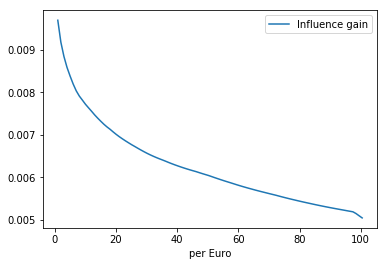

The maximun marginal influence gain found with 100 steps is with a budget of 1.0045909418378074 Euro per time unit


In [25]:
Step=100
SizeE=OT/Step
OSX=list()
OSX.append(0)
OSX2=list()
SOSX2=sum(OS[3])
for j in range(Step):
    aux=OSP(N,Lead,Lvec,Mvec,(j+1)*SizeE,1,i,Followers,restric,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)[0]
    OSX.append((sum(np.multiply(aux,OS[3]))-restric[i]*OS[3][i])/((j+1)*SizeE))
    OSX2.append(sum(np.multiply(aux,OS[3]))/SOSX2*100)
listaux=range(math.floor(OT))
listaux=[x*OT/Step for x in range(Step)]
listaux.append(OT)
del OSX[0]
del listaux[0]
datas={'Influence gain':OSX,'per Euro':listaux}
df = pd.DataFrame(datas)
print("                   Marginal Utility")
df.plot(x='per Euro',y='Influence gain')
plt.show()
print("The maximun marginal influence gain found with",Step,"steps is with a budget of",listaux[np.argmax(OSX)],"Euro per time unit")

                       Utility


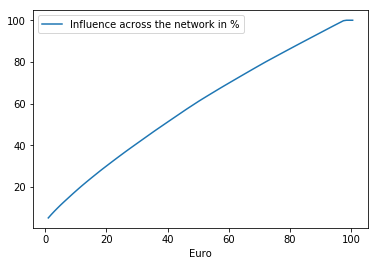

In [26]:
datas2={'Influence across the network in %':OSX2,'Euro':listaux}
df2 = pd.DataFrame(datas2)
print("                       Utility")
df2.plot(x='Euro',y='Influence across the network in %')
plt.show()

This is reasonable since we choose $r_n \sim U[0,1]$, so $\text{E}(r_n)=1/2$ and we can expect $50\%$ influence through the network.

## 3.2. OSP portfolio optimization numerical solutions based on advertising potential

We fix the number of categories and the categories per user.

In [27]:
N_c=200 #Number of categories
categ=list()
for user in range(N):
    categ.append(set(np.random.choice(N_c, 5, replace=False)))

### 3.2.1 OSP portfolio optimization problem based on advertising potential by setting $\epsilon$

We set $\epsilon$:

In [28]:
epsi=.5

Due to the nature of our problem we require an algorithm for large scale nonlinear optimization problems, therefore we decided to use the algorithm introduced by Byrd, Hribar and Nocedal in the paper "An Interior Point Algorithm for Large Scale Nonlinear Programming". The algorithm follows a barrier approach that uses sequential Quadratic programming and trust regions to solve the subproblems that occur in each iteration. 

The algorithm proposed by Byrd et al. reduces a measure of the optimality condition updating the solutions at each step while shrinking the region. To do this, first define of the problem the Lagrangian as well as a function that measures the optimality conditions of the barrier problem where the terms in this measure correspond to each of the
equations of the perturbed KKT system and the tolerance of this measure which determines the accuracy in the solution of the barrier problems is decreased from one barrier problem to the next and must converge to zero. Also, they propose a sequential quadratic programming method (because it is known to be effective for solving equality constrained problems) with trust regions that begins by constructing a quadratic model of the Lagrangian function. A step of the algorithm is computed by minimizing
the quadratic model subject to satisfying a linear approximation to the constraints and
subject to a trust region bound on this step. If the step gives a suficient reduction in a merit function then it is accepted otherwise the step is rejected and the trust region is reduced and a new step is computed. This sequential quadratic programming method is used in the algorithm in each step to reduce the trust region while the measure of optimality is being fulfilled.

We define a auxiliar function wich compute $\sum_{j \in \mathcal{N}\setminus \{i \} } f(\Omega^{(j)})$:

In [29]:
def Opti_f(N,P,Q,f,epsi,vec_a,categ):
    Omega=np.zeros(N)
    sum_aux2=0
    for user in range(N):
        if user!=i:
            sum_aux2=0
            for user2 in range(N):
                if user2<i:
                    if Q[user,user2]>epsi:
                        if len(categ[user].intersection(categ[user2]))!=0:
                            sum_aux2=sum_aux2+vec_a[user2]*Q[user,user2]
                if user2>i:
                    if Q[user,user2]>epsi:
                        if len(categ[user].intersection(categ[user2]))!=0:
                            sum_aux2=sum_aux2+vec_a[user2-1]*Q[user,user2]
            Omega[user]=sum_aux2
        else:
            Omega[user]=0
    sum_aux=0
    for user in range(N):
        sum_aux=f(Omega[user])+sum_aux
    return [-sum_aux,Omega]

In [30]:
def OSP_TRCA(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma,k1,k2,f,epsi,categ): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Maux=sum(Cs)-Cs[i]
    csaux=np.delete(Cs,i)
    psiaux=-1.0*(np.delete(Psi,i))
    Laux=np.delete(Lvec,i)
    Aaux=np.array([numpy.multiply(Laux,csaux),[0 for x in range(N-1)]])
    def Optim_f(vec_a):
        return Opti_f(N,P,Q,f,epsi,vec_a,categ)[0]
    linear_constraint = opt.LinearConstraint([numpy.multiply(Laux,csaux)], [0], [Budget])
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    a_bounds = opt.Bounds([0 for x in range(N-1)], [restriction[x] for x in range(N-1)])
    a0 = np.zeros(N-1)
    ind=np.nonzero(restriction)[0]
    ind=ind[0]
    a0[ind]=min(Budget/(Laux[ind]*csaux[ind]),restriction[ind])
    res = opt.minimize(Optim_f, a0, method='trust-constr', jac="2-point", hess=opt.SR1(),
                   constraints=linear_constraint,
                   options={'verbose': 1}, bounds=a_bounds)
    Omega=Opti_f(N,P,Q,f,epsi,res.x,categ)[1]
    StopT = time.time()
    TotalT = StopT-StartT
    return [res,P,Q,Psi,TotalT,df,Omega] 

$\mathbf{Note:}$ If $f$ is a smooth concave function, we guarantee the uniqueness, feasibility and existence of solutions and therefore the algorithm will find such solution as well as in the case of the indicator function (because the set of points of non-smoothness of this function has zero measure). In other case, we do not guaranteed the uniqueness nor the feasibility nor existence of solutions for all the functions $f$ and another observation is that the algorithm in this method finds local solutions, but not global ones.

We maximize the functions

In [31]:
def f(x):
    return x
RES=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,f,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:",np.round(RES[0].x,3))

`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 950, CG iterations: 43, optimality: 7.80e-10, constraint violation: 0.00e+00, execution time:  1.9 s.
We select the user participation rates to the users (excluding user  1 ) like: [1.    1.    0.    0.    1.    0.    1.    0.    1.    1.    0.    0.
 1.    0.    0.    1.    0.001 0.    1.    1.    1.    0.    0.    1.
 1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    1.
 1.    1.    0.191 1.    0.    0.    1.    0.    1.    0.    0.001 1.
 0.   ]


In [32]:
def fl(x):
    return log(x+1)
RESl=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fl,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESl[0].x,3))

`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 1300, CG iterations: 86, optimality: 6.61e-09, constraint violation: 0.00e+00, execution time:  1.9 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [1.    1.    0.    0.    0.968 0.    1.    0.    1.    1.    0.    0.
 1.    0.216 0.    1.    0.    0.    1.    1.    1.    0.    0.    1.
 1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.564
 1.    1.    0.473 1.    0.    0.    1.    0.    1.    0.    0.    1.
 0.   ]


In [33]:
def fs(x):
    if x<0:
        return 0
    return sqrt(abs(x))
RESs=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fs,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESs[0].x,3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 246, function evaluations: 13650, CG iterations: 5061, optimality: 9.11e-09, constraint violation: 0.00e+00, execution time: 2.1e+01 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [1.    1.    0.    0.    0.781 0.    1.    0.    1.    1.    0.    0.
 1.    0.395 0.    1.    0.    0.    1.    1.    1.    0.    0.    1.
 1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.508
 1.    0.93  0.535 1.    0.    0.    1.    0.    1.    0.    0.    1.
 0.   ]


In [34]:
def fq(x):
    return x**3
RESq=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fq,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESq[0].x,3))

`gtol` termination condition is satisfied.
Number of iterations: 51, function evaluations: 2250, CG iterations: 344, optimality: 3.89e-09, constraint violation: 0.00e+00, execution time:  3.4 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [1.    1.    0.    0.    1.    0.    1.    0.001 1.    1.    0.    0.
 1.    1.    0.    1.    0.004 0.    1.    1.    1.    0.    0.    1.
 1.    0.001 0.    0.    0.    1.    0.    0.001 1.    0.    0.    1.
 1.    0.    0.    1.    0.    0.    1.    0.    0.51  0.    0.003 1.
 0.   ]


In [35]:
def fI(x):
    if x<1/4:
        return 0
    return 1
RESI=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fI,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESI[0].x,3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 250, CG iterations: 6, optimality: 7.00e-09, constraint violation: 0.00e+00, execution time: 0.28 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698 0.276 0.265 0.277 0.245 0.239 0.259 0.291 0.284 0.27  0.288 0.285
 0.279 0.225 0.252 0.25  0.293 0.281 0.279 0.256 0.288 0.276 0.281 0.281
 0.276 0.292 0.279 0.288 0.269 0.257 0.269 0.291 0.275 0.285 0.289 0.227
 0.287 0.251 0.237 0.283 0.264 0.267 0.276 0.282 0.264 0.275 0.293 0.271
 0.255]


In [36]:
delta=1/2
beta=1
def fS(x):
    return 1/(1+exp(beta*(x-delta)))
RESS=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fS,epsi,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESS[0].x,3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 850, CG iterations: 36, optimality: 9.08e-09, constraint violation: 0.00e+00, execution time:  1.1 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.    0.    0.514 0.512 0.    0.51  0.    0.506 0.    0.    0.507 0.509
 0.    0.    0.514 0.    0.505 0.51  0.    0.    0.    0.512 0.51  0.
 0.    0.505 0.511 0.507 0.514 0.    0.514 0.505 0.    0.509 0.507 0.
 0.    0.    0.    0.    0.514 0.514 0.    0.51  0.    0.512 0.504 0.
 0.514]


In [37]:
delta=1/2
def fI(x):
    if x<delta:
        return 0
    return 1
RESI=OSP_TRCA(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fI,epsi,categ)
print("We select the user participation rates (excluding user ",i,") as:","\n",np.round(RESI[0].x,3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 250, CG iterations: 6, optimality: 7.00e-09, constraint violation: 0.00e+00, execution time: 0.27 s.
We select the user participation rates (excluding user  1 ) as: 
 [0.698 0.276 0.265 0.277 0.245 0.239 0.259 0.291 0.284 0.27  0.288 0.285
 0.279 0.225 0.252 0.25  0.293 0.281 0.279 0.256 0.288 0.276 0.281 0.281
 0.276 0.292 0.279 0.288 0.269 0.257 0.269 0.291 0.275 0.285 0.289 0.227
 0.287 0.251 0.237 0.283 0.264 0.267 0.276 0.282 0.264 0.275 0.293 0.271
 0.255]


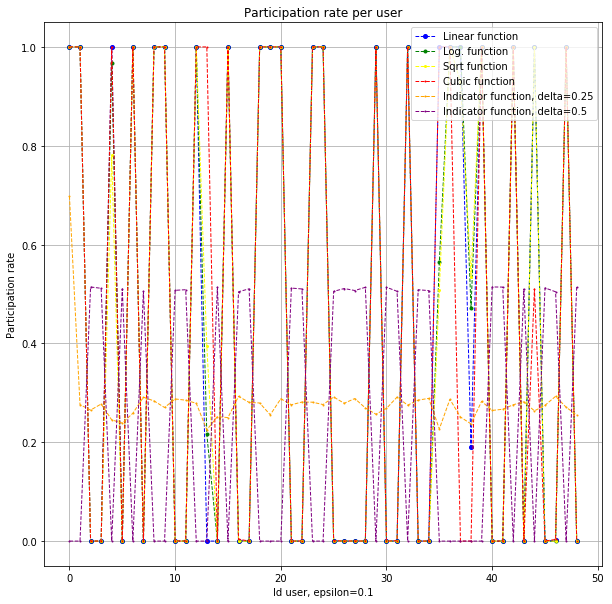

In [38]:
fig = plt.figure(figsize=(10,10))

plt.plot(RES[0].x, color='blue', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4, label = "Linear function") 
  
plt.plot(RESl[0].x, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function") 

plt.plot(RESs[0].x, color='yellow', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='yellow', markersize=2, label = "Sqrt function") 

plt.plot(RESq[0].x, color='red', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Cubic function") 

plt.plot(RESI[0].x, color='orange', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Indicator function, delta=0.25") 

plt.plot(RESS[0].x, color='purple', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Indicator function, delta=0.5") 
 

# naming the x axis 
plt.xlabel('Id user, epsilon=0.1') 
# naming the y axis 
plt.ylabel('Participation rate') 
  
# giving a title to my graph 
plt.title('Participation rate per user') 

# show a legend on the plot 
plt.grid(True)
plt.legend( loc="upper right" ) 
  
# function to show the plot 
plt.show() 

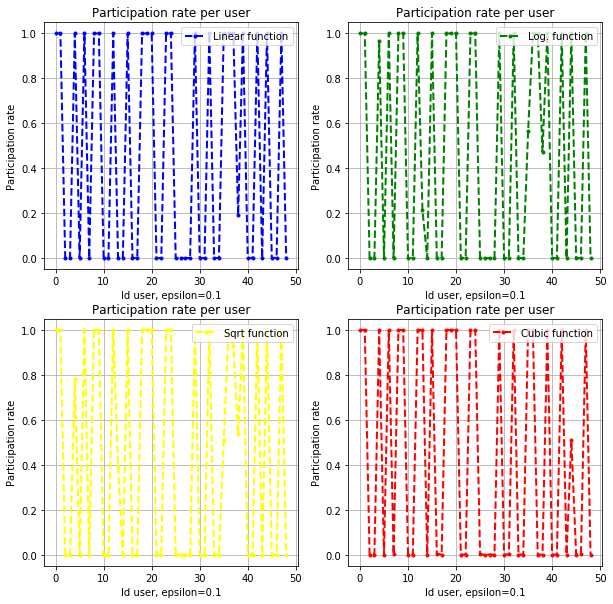

In [39]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax2 = plt.subplot2grid((2,2), (1,0),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax3 = plt.subplot2grid((2,2), (0,1),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax4 = plt.subplot2grid((2,2), (1,1),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)


ax1.plot(RES[0].x, color='blue', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=3, label = "Linear function")

ax1.legend( loc="upper right" )

ax2.plot(RESs[0].x, color='yellow', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='yellow', markersize=3, label = "Sqrt function")

ax2.legend( loc="upper right" )

ax3.plot(RESl[0].x, color='green', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function")
ax3.legend( loc="upper right" )
ax4.plot(RESq[0].x, color='red', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='red', markersize=3, label = "Cubic function")

ax4.legend( loc="upper right" ) 

plt.show()

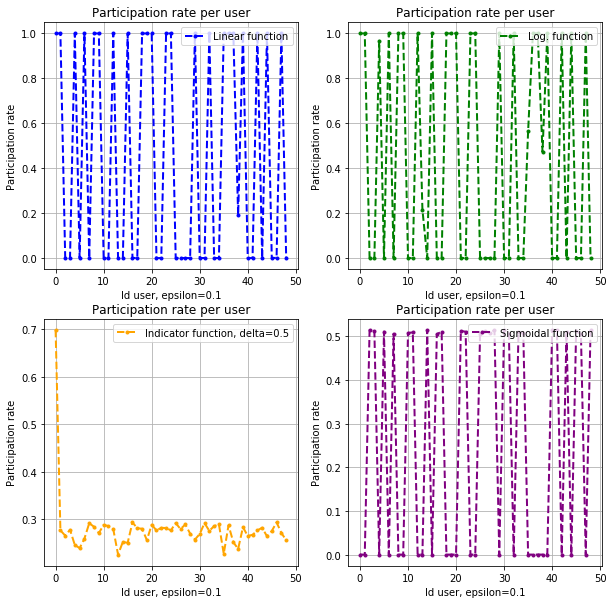

In [40]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax2 = plt.subplot2grid((2,2), (1,0),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax3 = plt.subplot2grid((2,2), (0,1),)
plt.xlabel("Id user, epsilon=0.1")  
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax4 = plt.subplot2grid((2,2), (1,1),)
plt.xlabel("Id user, epsilon=0.1") 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)


ax1.plot(RES[0].x, color='blue', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=3, label = "Linear function")

ax1.legend( loc="upper right" )

ax2.plot(RESI[0].x, color='orange', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='orange', markersize=3, label = "Indicator function, delta=0.5")

ax2.legend( loc="upper right" )

ax3.plot(RESl[0].x, color='green', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function")
ax3.legend( loc="upper right" )
ax4.plot(RESS[0].x, color='purple', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='purple', markersize=3, label = "Sigmoidal function")

ax4.legend( loc="upper right" ) 

plt.show()

### 3.2.2 OSP portfolio optimization problem based on advertising potential by considering $\epsilon$ as a variable


We do the change about maximize with $\epsilon$

In [41]:
def OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,Budget,Me,i,Follow,restriction,gamma,k1,k2,f,categ): #i index over advertising campaign between [0,N-1]
    #This function solves our OSP portfolio optimization problem, it receives: the number of users N, vector of leader for each user, 
    #vector of user activity corresponding to post and re-post rates, a Budget>=0, a specific algorithm to use (Me=0 closed-form algorithm or in other case fixed-point algorithm),
    #and an user i where our advertising campaign is applied between [0,N-1] and it returns between other things, the values of the decision variables 
    #that maximizes the objective function while satisfying the constraints and the optimal value of the objective function
    StartT = time.time()
    if Me==0:
        [P,Q,Psi]=InvM(N,Lvec,Mvec,Lead)
    else:
        [P,Q,Psi]=PM(N,Lvec,Mvec,Lead)
    Cs=Ct(N,Lead,Lvec,Mvec,P,Q,Psi,Follow,restriction,gamma=gamma_aux,k1=k1_aux,k2=k2_aux)
    Maux=sum(Cs)-Cs[i]
    csaux=np.delete(Cs,i)
    psiaux=-1.0*(np.delete(Psi,i))
    Laux=np.delete(Lvec,i)
    Aaux=np.array([numpy.multiply(Laux,csaux),[0 for x in range(N-1)]])
    def Optim_f(vec_a):
        aux_vec= np.delete(range(N),N-1)
        return Opti_f(N,P,Q,f,vec_a[N-1],aux_vec,categ)[0]
    Lcsaux_epsilon=np.zeros(N)
    for x in range(N-1):
        Lcsaux_epsilon[x]=numpy.multiply(Laux,csaux)[x]
    Lcsaux_epsilon[N-1]=0
    linear_constraint = opt.LinearConstraint([Lcsaux_epsilon], [0], [Budget])
    data={'Self-post rate':Lvec,'Re-post rate':Mvec,'Number of followers':[len(Follow[x]) for x in range(N)],'Number of leaders':[len(Lead[x]) for x in range(N)],'Cost per post':Cs,'Influence':Psi}
    df = pd.DataFrame(data)
    res_aux=np.zeros(N)
    res_aux[N-1]=1
    for x in range(N-1):
        res_aux[x]=restriction[x]  
    a_bounds = opt.Bounds([0 for x in range(N)], res_aux)
    a0 = np.zeros(N)
    a0[N-1]=1
    ind=np.nonzero(restriction)[0]
    ind=ind[0]
    a0[ind]=min(Budget/(Laux[ind]*csaux[ind]),restriction[ind])
    res = opt.minimize(Optim_f, a0, method='trust-constr', jac="2-point", hess=opt.SR1(),
                   constraints=linear_constraint,
                   options={'verbose': 1}, bounds=a_bounds)
    Omega=Opti_f(N,P,Q,f,epsi,res.x,categ)[1]
    StopT = time.time()
    TotalT = StopT-StartT
    return [res,P,Q,Psi,TotalT,df,Omega] 

In [42]:
def f(x):
    return x
RES_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,f,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RES_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RES_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 255, CG iterations: 6, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time: 0.58 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698  0.2761 0.265  0.2774 0.2452 0.2386 0.2586 0.2912 0.2837 0.2703
 0.2877 0.2851 0.2788 0.2249 0.2517 0.2498 0.2929 0.2807 0.2795 0.2555
 0.2881 0.2758 0.2814 0.2811 0.2762 0.2916 0.2789 0.2885 0.2694 0.2566
 0.2684 0.2915 0.275  0.2853 0.2889 0.2266 0.287  0.2509 0.237  0.2828
 0.2643 0.2667 0.2759 0.2818 0.2635 0.2747 0.293  0.2708 0.2551]
The epsilon that we select is 0.707


In [43]:
def fl(x):
    return log(x+1)
RESl_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fl,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESl_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RESl_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 255, CG iterations: 6, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time:  0.8 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698  0.2761 0.265  0.2774 0.2452 0.2386 0.2586 0.2912 0.2837 0.2703
 0.2877 0.2851 0.2788 0.2249 0.2517 0.2498 0.2929 0.2807 0.2795 0.2555
 0.2881 0.2758 0.2814 0.2811 0.2762 0.2916 0.2789 0.2885 0.2694 0.2566
 0.2684 0.2915 0.275  0.2853 0.2889 0.2266 0.287  0.2509 0.237  0.2828
 0.2643 0.2667 0.2759 0.2818 0.2635 0.2747 0.293  0.2708 0.2551]
The epsilon that we select is 0.707


In [44]:
def fs(x):
    if x<0:
        return 0
    return sqrt(x)
RESs_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fs,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESs_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RESs_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 255, CG iterations: 6, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time: 0.51 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698  0.2761 0.265  0.2774 0.2452 0.2386 0.2586 0.2912 0.2837 0.2703
 0.2877 0.2851 0.2788 0.2249 0.2517 0.2498 0.2929 0.2807 0.2795 0.2555
 0.2881 0.2758 0.2814 0.2811 0.2762 0.2916 0.2789 0.2885 0.2694 0.2566
 0.2684 0.2915 0.275  0.2853 0.2889 0.2266 0.287  0.2509 0.237  0.2828
 0.2643 0.2667 0.2759 0.2818 0.2635 0.2747 0.293  0.2708 0.2551]
The epsilon that we select is 0.707


In [45]:
def fq(x):
    return x**3
RESq_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fq,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESq_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RESq_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 255, CG iterations: 6, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time: 0.45 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698  0.2761 0.265  0.2774 0.2452 0.2386 0.2586 0.2912 0.2837 0.2703
 0.2877 0.2851 0.2788 0.2249 0.2517 0.2498 0.2929 0.2807 0.2795 0.2555
 0.2881 0.2758 0.2814 0.2811 0.2762 0.2916 0.2789 0.2885 0.2694 0.2566
 0.2684 0.2915 0.275  0.2853 0.2889 0.2266 0.287  0.2509 0.237  0.2828
 0.2643 0.2667 0.2759 0.2818 0.2635 0.2747 0.293  0.2708 0.2551]
The epsilon that we select is 0.707


In [46]:
delta=1/2
beta=1
def fS(x):
    return 1/(1+exp(beta*(x-delta)))
RESS_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fS,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESS_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RESS_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 2805, CG iterations: 121, optimality: 6.92e-09, constraint violation: 0.00e+00, execution time:  4.3 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.5351 0.3374 0.288  0.3434 0.203  0.1753 0.2604 0.4091 0.3726 0.3114
 0.3919 0.3796 0.35   0.1174 0.2306 0.2226 0.4176 0.3585 0.353  0.2469
 0.3937 0.3364 0.3621 0.3604 0.3381 0.411  0.3503 0.3957 0.3074 0.2519
 0.3032 0.4103 0.3327 0.3801 0.3975 0.1247 0.3883 0.2273 0.1685 0.3685
 0.2851 0.2955 0.3368 0.3637 0.2816 0.3312 0.4181 0.3135 0.2453]
The epsilon that we select is 0.809


In [47]:
delta=1/2
def fI(x):
    if x<delta:
        return 0
    return 1
RESI_epsilon=OSP_TRCA_epsilon(N,Lead,Lvec,Mvec,B,1,i,Followers,restric,gamma_aux,k1_aux,k2_aux,fI,categ)
print("We select the user participation rates to the users (excluding user ",i,") like:","\n",np.round(RESI_epsilon[0].x[:N-1],4))
print("The epsilon that we select is",np.round(RESI_epsilon[0].x[N-1],3))

C:\Users\Ricardo López\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 255, CG iterations: 6, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time:  0.3 s.
We select the user participation rates to the users (excluding user  1 ) like: 
 [0.698  0.2761 0.265  0.2774 0.2452 0.2386 0.2586 0.2912 0.2837 0.2703
 0.2877 0.2851 0.2788 0.2249 0.2517 0.2498 0.2929 0.2807 0.2795 0.2555
 0.2881 0.2758 0.2814 0.2811 0.2762 0.2916 0.2789 0.2885 0.2694 0.2566
 0.2684 0.2915 0.275  0.2853 0.2889 0.2266 0.287  0.2509 0.237  0.2828
 0.2643 0.2667 0.2759 0.2818 0.2635 0.2747 0.293  0.2708 0.2551]
The epsilon that we select is 0.707


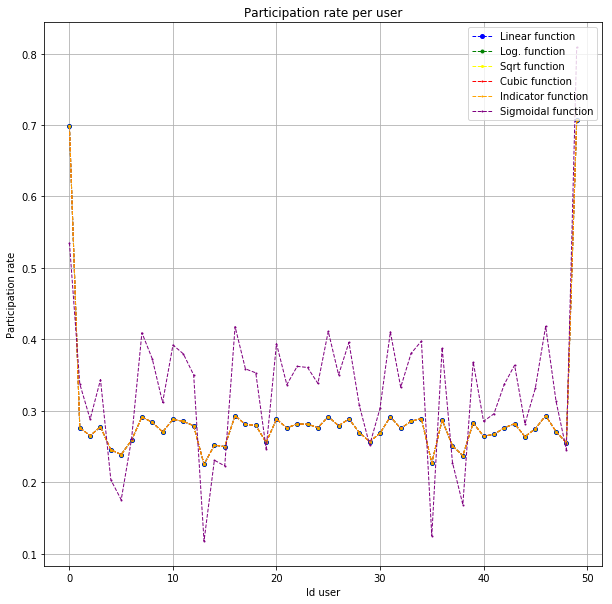

In [48]:
fig = plt.figure(figsize=(10,10))

plt.plot(RES_epsilon[0].x, color='blue', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4, label = "Linear function") 
  
plt.plot(RESl_epsilon[0].x, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function") 

plt.plot(RESs_epsilon[0].x, color='yellow', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='yellow', markersize=2, label = "Sqrt function") 

plt.plot(RESq_epsilon[0].x, color='red', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Cubic function") 

plt.plot(RESI_epsilon[0].x, color='orange', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Indicator function") 

plt.plot(RESS_epsilon[0].x, color='purple', linestyle='dashed', linewidth =1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Sigmoidal function") 


# naming the x axis 
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 
  
# giving a title to my graph 
plt.title('Participation rate per user') 

# show a legend on the plot 
plt.grid(True)
plt.legend( loc="upper right" ) 
  
# function to show the plot 
plt.show() 

Observation: The last element in the vector corresponds to the selected $\epsilon$.

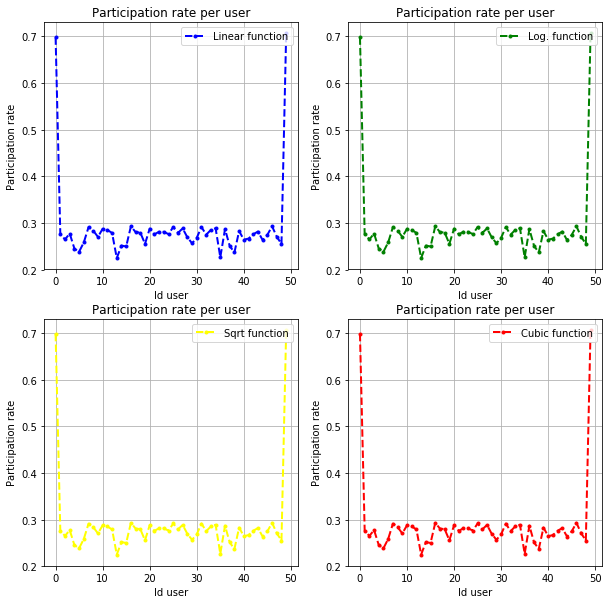

In [49]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax2 = plt.subplot2grid((2,2), (1,0),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax3 = plt.subplot2grid((2,2), (0,1),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax4 = plt.subplot2grid((2,2), (1,1),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax1.plot(RES_epsilon[0].x, color='blue', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=3, label = "Linear function")
plt.xlabel("Id user")
plt.xlabel("Id user") 
ax1.legend( loc="upper right" )

ax2.plot(RESs_epsilon[0].x, color='yellow', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='yellow', markersize=3, label = "Sqrt function")

ax2.legend( loc="upper right" )

ax3.plot(RESl_epsilon[0].x, color='green', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function")
ax3.legend( loc="upper right" )
ax4.plot(RESq_epsilon[0].x, color='red', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='red', markersize=3, label = "Cubic function")

ax4.legend( loc="upper right" ) 

plt.show()

Observation: The last element in the vector corresponds to the selected $\epsilon$.

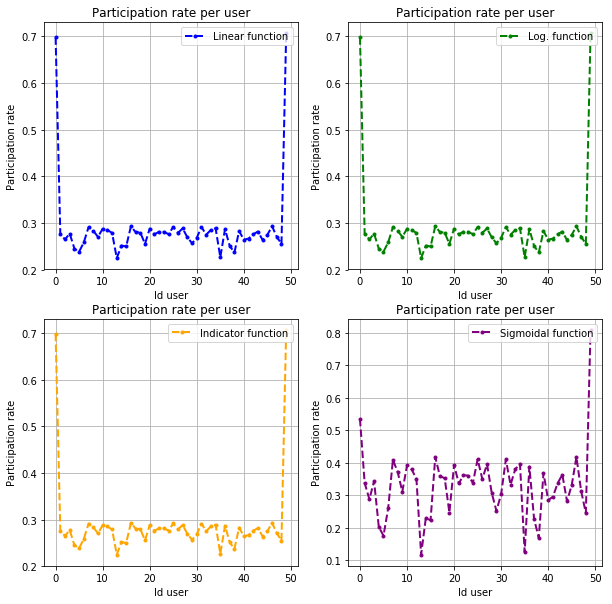

In [50]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax2 = plt.subplot2grid((2,2), (1,0),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax3 = plt.subplot2grid((2,2), (0,1),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 

# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax4 = plt.subplot2grid((2,2), (1,1),)
plt.xlabel('Id user') 
# naming the y axis 
plt.ylabel('Participation rate') 


# giving a title to my graph 
plt.title('Participation rate per user') 

plt.grid(True)

ax1.plot(RES_epsilon[0].x, color='blue', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=3, label = "Linear function")
plt.xlabel("Id user") 
ax1.legend( loc="upper right" )

ax2.plot(RESI_epsilon[0].x, color='orange', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='orange', markersize=3, label = "Indicator function")

ax2.legend( loc="upper right" )

ax3.plot(RESl_epsilon[0].x, color='green', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='green', markersize=3, label = "Log. function")
ax3.legend( loc="upper right" )
ax4.plot(RESS_epsilon[0].x, color='purple', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='purple', markersize=3, label = "Sigmoidal function")

ax4.legend( loc="upper right" ) 

plt.show()

Note: The last element in the vector corresponds to the selected $\epsilon$.

## 4. Analysis and relevant observations of the different approaches studied



We use two functions to compare our approaches: audience size and the Cumulative influence of the advertising campaign. 

Below we present the graphs obtained for the types of functions studied assuming that the metric is the audience size:

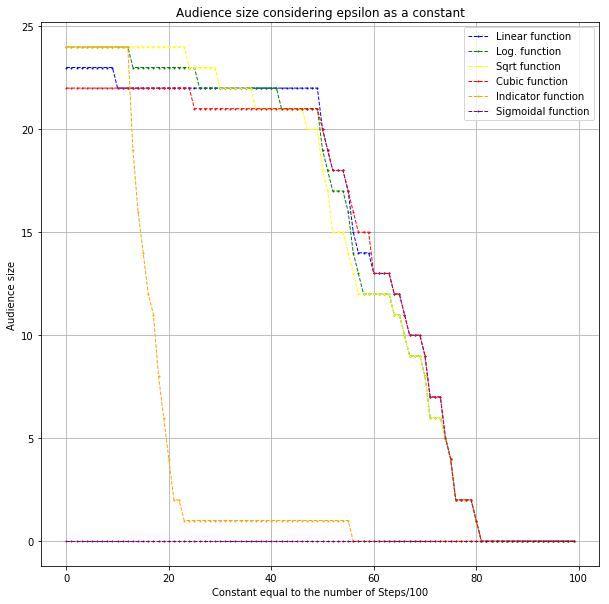

In [53]:
Step=10**2
Size=1/Step

A1=[audience_size(RES_epsilon[6],(j+1)*Size) for j in range(Step)]
A2=[audience_size(RESl_epsilon[6],(j+1)*Size) for j in range(Step)]
A3=[audience_size(RESs_epsilon[6],(j+1)*Size) for j in range(Step)]
A4=[audience_size(RESq_epsilon[6],(j+1)*Size) for j in range(Step)]
A5=[audience_size(RESI_epsilon[6],(j+1)*Size) for j in range(Step)]
A6=[audience_size(RESS_epsilon[6],(j+1)*Size) for j in range(Step)]

B1=[audience_size(RES[6],(j+1)*Size) for j in range(Step)]
B2=[audience_size(RESl[6],(j+1)*Size) for j in range(Step)]
B3=[audience_size(RESs[6],(j+1)*Size) for j in range(Step)]
B4=[audience_size(RESq[6],(j+1)*Size) for j in range(Step)]
B5=[audience_size(RESI[6],(j+1)*Size) for j in range(Step)]
B6=[audience_size(RESS[6],(j+1)*Size) for j in range(Step)]


fig = plt.figure(figsize=(10,10))

plt.plot(B1, color='blue', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=1, label = "Linear function") 
  
plt.plot(B2, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='green', markersize=1, label = "Log. function") 

plt.plot(B3, color='yellow', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='yellow', markersize=1, label = "Sqrt function") 

plt.plot(B4, color='red', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Cubic function") 

plt.plot(B5, color='orange', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Indicator function") 

plt.plot(B6, color='purple', linestyle='dashed', linewidth =1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Sigmoidal function")



# naming the x axis 
plt.xlabel('Constant equal to the number of Steps/100') 
# naming the y axis 
plt.ylabel('Audience size') 
  
# giving a title to my graph 
plt.title('Audience size considering epsilon as a constant') 

# show a legend on the plot 
plt.grid(True)
plt.legend( loc="upper right" ) 
  
# function to show the plot 
plt.show() 

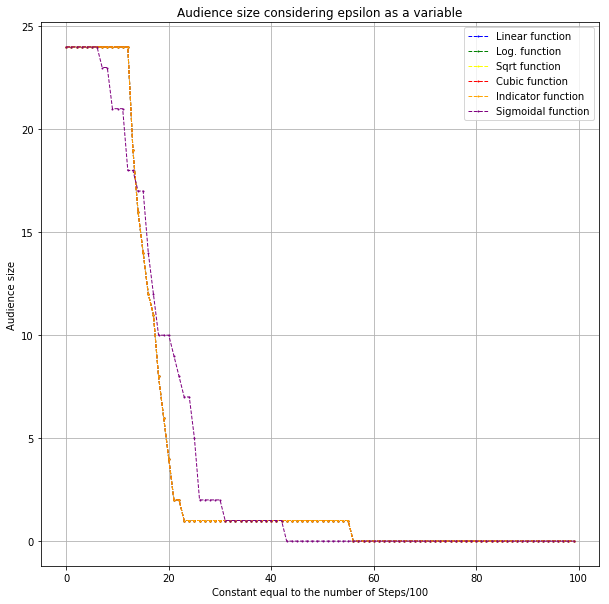

In [54]:
Step=100
Size=1/Step
def audience_size(vec,d): #We exclude the user i of the audience size
    s=0
    for i in vec:
        if i>d:
            s=s+1
    return s


A1=[audience_size(RES_epsilon[6],(j+1)*Size) for j in range(Step)]
A2=[audience_size(RESl_epsilon[6],(j+1)*Size) for j in range(Step)]
A3=[audience_size(RESs_epsilon[6],(j+1)*Size) for j in range(Step)]
A4=[audience_size(RESq_epsilon[6],(j+1)*Size) for j in range(Step)]
A5=[audience_size(RESI_epsilon[6],(j+1)*Size) for j in range(Step)]
A6=[audience_size(RESS_epsilon[6],(j+1)*Size) for j in range(Step)]

B1=[audience_size(RES[6],(j+1)*Size) for j in range(Step)]
B2=[audience_size(RESl[6],(j+1)*Size) for j in range(Step)]
B3=[audience_size(RESs[6],(j+1)*Size) for j in range(Step)]
B4=[audience_size(RESq[6],(j+1)*Size) for j in range(Step)]
B5=[audience_size(RESI[6],(j+1)*Size) for j in range(Step)]
B6=[audience_size(RESS[6],(j+1)*Size) for j in range(Step)]
aux=[(j+1)*Size for j in range(Step)]
fig = plt.figure(figsize=(10,10))

plt.plot(A1, color='blue', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=1, label = "Linear function") 
  
plt.plot(A2, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='green', markersize=1, label = "Log. function") 

plt.plot(A3, color='yellow', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='yellow', markersize=1, label = "Sqrt function") 

plt.plot(A4, color='red', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Cubic function") 

plt.plot(A5, color='orange', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Indicator function") 

plt.plot(A6, color='purple', linestyle='dashed', linewidth =1, 
         marker='o', markerfacecolor='red', markersize=1, label = "Sigmoidal function")

# naming the x axis 
plt.xlabel('Constant equal to the number of Steps/100') 
# naming the y axis 
plt.ylabel('Audience size') 
  
# giving a title to my graph 
plt.title('Audience size considering epsilon as a variable') 

# show a legend on the plot 
plt.grid(True)
plt.legend( loc="upper right" ) 
  
# function to show the plot 
plt.show() 

## Reference

[1]. Giovanidis, A., Baynat, B., & Vendeville, A. (2019, April). Performance analysis of online social platforms. In IEEE INFOCOM 2019-IEEE Conference on Computer Communications (pp. 2413-2421). IEEE.